# Country Development Clustering: Identifying Priority Nations for Aid  
### First Notebook: Introduction

Understanding the similarities and differences between countries based on socio-economic and health indicators is critical for organizations aiming to allocate resources effectively. HELP International, a humanitarian NGO committed to fighting poverty and providing basic amenities during disasters, wants to strategically use its $10 million in aid.

This project, developed as part of the **Unsupervised Machine Learning** module of the **IBM Machine Learning Professional Certificate**, uses the **Unsupervised Learning on Country Data** dataset from Kaggle. The analysis applies multiple clustering algorithms and dimensionality reduction techniques to categorize countries based on socio-economic and health factors that determine overall development.

The main objective of this analysis is to identify groups of countries with similar development profiles and to provide actionable recommendations to HELP International’s CEO. Insights derived from this clustering can help the organization decide which countries are in the direst need of aid and ensure that resources are allocated efficiently and effectively.

Parts of the code structure and exploratory analysis approach were inspired by Kaggle notebooks shared by fellow learners:  
- [Country Clustering EDA + PCA by Melissa Monfared](https://www.kaggle.com/code/melissamonfared/country-clustering-eda-pca)  
- [Clustering + PCA + K-Means + DBSCAN + Hierarchical by Tanmay111999](https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical)  

All adaptations, interpretations, and conclusions are my own.

**Author:** J-F Jutras  
**Date:** September 2025  
**Dataset:** [Unsupervised Learning on Country Data – Kaggle](https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data)


## 1.1-Data Loading and Overview

The dataset is retrieved directly from Kaggle using the kagglehub library. This ensures the analysis remains reproducible and uses the latest available version.

In [1]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

#Load dataset directly from Kaggle cache
df = pd.read_csv(f"{path}/Country-data.csv")

| **Column Name** | **Description** |
|:----------------|:----------------|
| `country` | Name of the country |
| `child_mort` | Deaths of children under 5 years of age per 1000 live births |
| `exports` | Exports of goods and services per capita (as % of GDP per capita) |
| `health` | Total health spending per capita (as % of GDP per capita) |
| `imports` | Imports of goods and services per capita (as % of GDP per capita) |
| `income` | Net income per person |
| `inflation` | Annual growth rate of the total GDP |
| `life_expec` | Average number of years a newborn is expected to live if current mortality patterns persist |
| `total_fer` | Number of children born per woman if current age-fertility rates remain constant |
| `gdpp` | GDP per capita (Total GDP divided by total population) |


In [2]:
#Check first rows
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
#Check last rows
df.tail()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310
166,Zambia,83.1,37.0,5.89,30.9,3280,14.00,52.0,5.40,1460


In [4]:
def check_df(df):
    #Show all column names
    print("\nColumns:")
    print(df.columns.tolist())
    
    #Show the shape of the dataset (rows, columns)
    print("\nShape:")
    print(df.shape)
    
    #Show the data types of each column
    print("\nData types:")
    print(df.dtypes)
    
    #Show the number of missing values in each column
    print("\nMissing values (NaN):")
    print(df.isnull().sum())
    
    #Show the number of duplicated rows
    print("\nDuplicates:")
    print(df.duplicated().sum())
    
    #Show general information about the DataFrame
    print("\nInfo:")
    print(df.info())

#Run the function
check_df(df)


Columns:
['country', 'child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']

Shape:
(167, 10)

Data types:
country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

Missing values (NaN):
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

Duplicates:
0

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64

In [5]:
# Display summary statistics for all numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
child_mort,167.0,38.270060,40.328931,2.6000,8.250,19.30,62.10,208.00
exports,167.0,41.108976,27.412010,0.1090,23.800,35.00,51.35,200.00
health,167.0,6.815689,2.746837,1.8100,4.920,6.32,8.60,17.90
imports,167.0,46.890215,24.209589,0.0659,30.200,43.30,58.75,174.00
income,167.0,17144.688623,19278.067698,609.0000,3355.000,9960.00,22800.00,125000.00
inflation,167.0,7.781832,10.570704,-4.2100,1.810,5.39,10.75,104.00
life_expec,167.0,70.555689,8.893172,32.1000,65.300,73.10,76.80,82.80
total_fer,167.0,2.947964,1.513848,1.1500,1.795,2.41,3.88,7.49
gdpp,167.0,12964.155689,18328.704809,231.0000,1330.000,4660.00,14050.00,105000.00


The dataset reveals significant disparities among 167 countries in terms of income, health, and overall development. 

The *inflation* variable, defined here as the **annual growth rate of total GDP**, does **not follow the traditional definition of inflation** (which typically measures price increases). This difference should be considered carefully during analysis and interpretation, as it affects how we understand a country's economic stability and growth patterns.

High values in exports, imports, and health represent the proportion of GDP per capita allocated to these areas — reflecting how a country structures its economy and spending priorities, rather than the absolute wealth involved.To gain a more complete perspective, we also compute the corresponding monetary amounts (exports_amount, imports_amount, health_amount). These values represent the approximate per-capita dollar amounts behind those percentages, providing a view of each country’s actual economic capacity in trade and health investment.

By analyzing both the relative ratios (% of GDP) and the absolute values ($ per person), we can explore whether countries with similar economic structures also share comparable levels of real wealth and resources.

Overall, the indicators highlight clear contrasts between developed and developing nations, providing a solid foundation for identifying clusters of similar development levels.

In [6]:
#Create a separate dataset with absolute amounts
#We add these columns here to enrich the dataset for visualization and comparison purposes.
#For modeling tasks like clustering, it's often better to create a separate copy
#to avoid redundancy and ensure that similar variables don't dominate the distance metrics.

df2 = df.copy()

df2['exports_amount'] = df2['exports'] / 100 * df2['gdpp']
df2['imports_amount'] = df2['imports'] / 100 * df2['gdpp']
df2['health_amount'] = df2['health'] / 100 * df2['gdpp']

df2[['country', 'exports_amount', 'imports_amount', 'health_amount']].head()


,country,exports_amount,imports_amount,health_amount
0,Afghanistan,55.30,248.297,41.9174
1,Albania,1145.20,1987.740,267.8950
2,Algeria,1712.64,1400.440,185.9820
3,Angola,2199.19,1514.370,100.6050
4,Antigua and Barbuda,5551.00,7185.800,735.6600


## 1.2-Data Visualization, Exploration and Analysis

### Why visualize the data geographically?
Geospatial visualization allows us to identify regional development patterns at a glance. It provides context to the numerical analysis by showing how health, income, and mortality vary across continents, which is an essential perspective for an NGO deciding where to allocate aid.


In [7]:
#Visualize countries with the highest under-5 child mortality
import plotly.express as px

fig = px.choropleth(df,
                   locations = 'country',
                   locationmode = 'country names',
                   color = 'child_mort',
                   color_continuous_scale = 'reds',
                   hover_name = 'country',
                   title = 'Child Mortality (deaths per 1000 live births)')
fig.update_layout(coloraxis_colorbar = dict(title = 'Child Mortality'))
fig.show()

In [8]:
#Visualize countries with the highest income per capita

fig = px.choropleth(df,
                   locations = 'country',
                   locationmode = 'country names',
                   color = 'income',
                   color_continuous_scale = 'Blues',
                   hover_name = 'country',
                   title = 'Income per Capita')
fig.update_layout(coloraxis_colorbar = dict(title = 'Income'))
fig.show()

In [9]:
#Visualize countries with the highest GDP per capita

fig = px.choropleth(df,
                   locations='country',
                   locationmode='country names',
                   color='gdpp',
                   color_continuous_scale='Greens',
                   hover_name='country',
                   title='GDP per Capita')
fig.update_layout(coloraxis_colorbar=dict(title='GDP per Capita'))
fig.show()

In [10]:
#Visualize countries with the highest life expectancy
fig = px.choropleth(df,
                   locations = 'country',
                   locationmode = 'country names',
                   color = 'life_expec',
                   color_continuous_scale = 'Purples',
                   hover_name = 'country',
                   title = 'Life Expectancy')
fig.update_layout(coloraxis_colorbar = dict(title = 'Life Expectancy (years)'))
fig.show()

In [11]:
# Visualize countries with the highest health spending per capita

fig = px.choropleth(df2,
                   locations='country',
                   locationmode='country names',
                   color='health_amount',
                   color_continuous_scale='Oranges',
                   hover_name='country',
                   title='Health Spending per Capita')
fig.update_layout(coloraxis_colorbar=dict(title='Health Spending (per person)'))
fig.show()

In [12]:
import numpy as np

# Calculate 5th and 95th percentiles to limit the effect of extreme outliers
# This ensures the color scale reflects the majority of countries, making patterns more visible
exports_min, exports_max = np.percentile(df2['exports_amount'], [5, 95])

# Visualize countries with the highest exports per capita
# Using percentile limits so the color differences among most countries are more visible
fig = px.choropleth(df2,
                   locations='country',
                   locationmode='country names',
                   color='exports_amount',
                   color_continuous_scale='Blues',
                   hover_name='country',
                   title='Exports per Capita',
                   range_color=[exports_min, exports_max])
fig.update_layout(coloraxis_colorbar=dict(title='Exports (per person)'))
fig.show()

In [13]:
import numpy as np

# Calculate 5th and 95th percentiles to limit the effect of extreme outliers
# This ensures the color scale reflects the majority of countries, making patterns more visible
imports_min, imports_max = np.percentile(df2['imports_amount'], [5, 95])

# Visualize countries with the highest imports per capita
# Using percentile limits to avoid the color scale being skewed by very large importers
fig = px.choropleth(df2,
                   locations='country',
                   locationmode='country names',
                   color='imports_amount',
                   color_continuous_scale='Oranges',
                   hover_name='country',
                   title='Imports per Capita',
                   range_color=[imports_min, imports_max])
fig.update_layout(coloraxis_colorbar=dict(title='Imports (per person)'))
fig.show()

### Why examine variable distributions?
Understanding the distribution of each feature helps detect skewness, multimodality, and potential data transformations required before modeling. Many unsupervised learning methods, such as PCA or K-Means, assume normally distributed or scaled features, so this step informs preprocessing decisions.


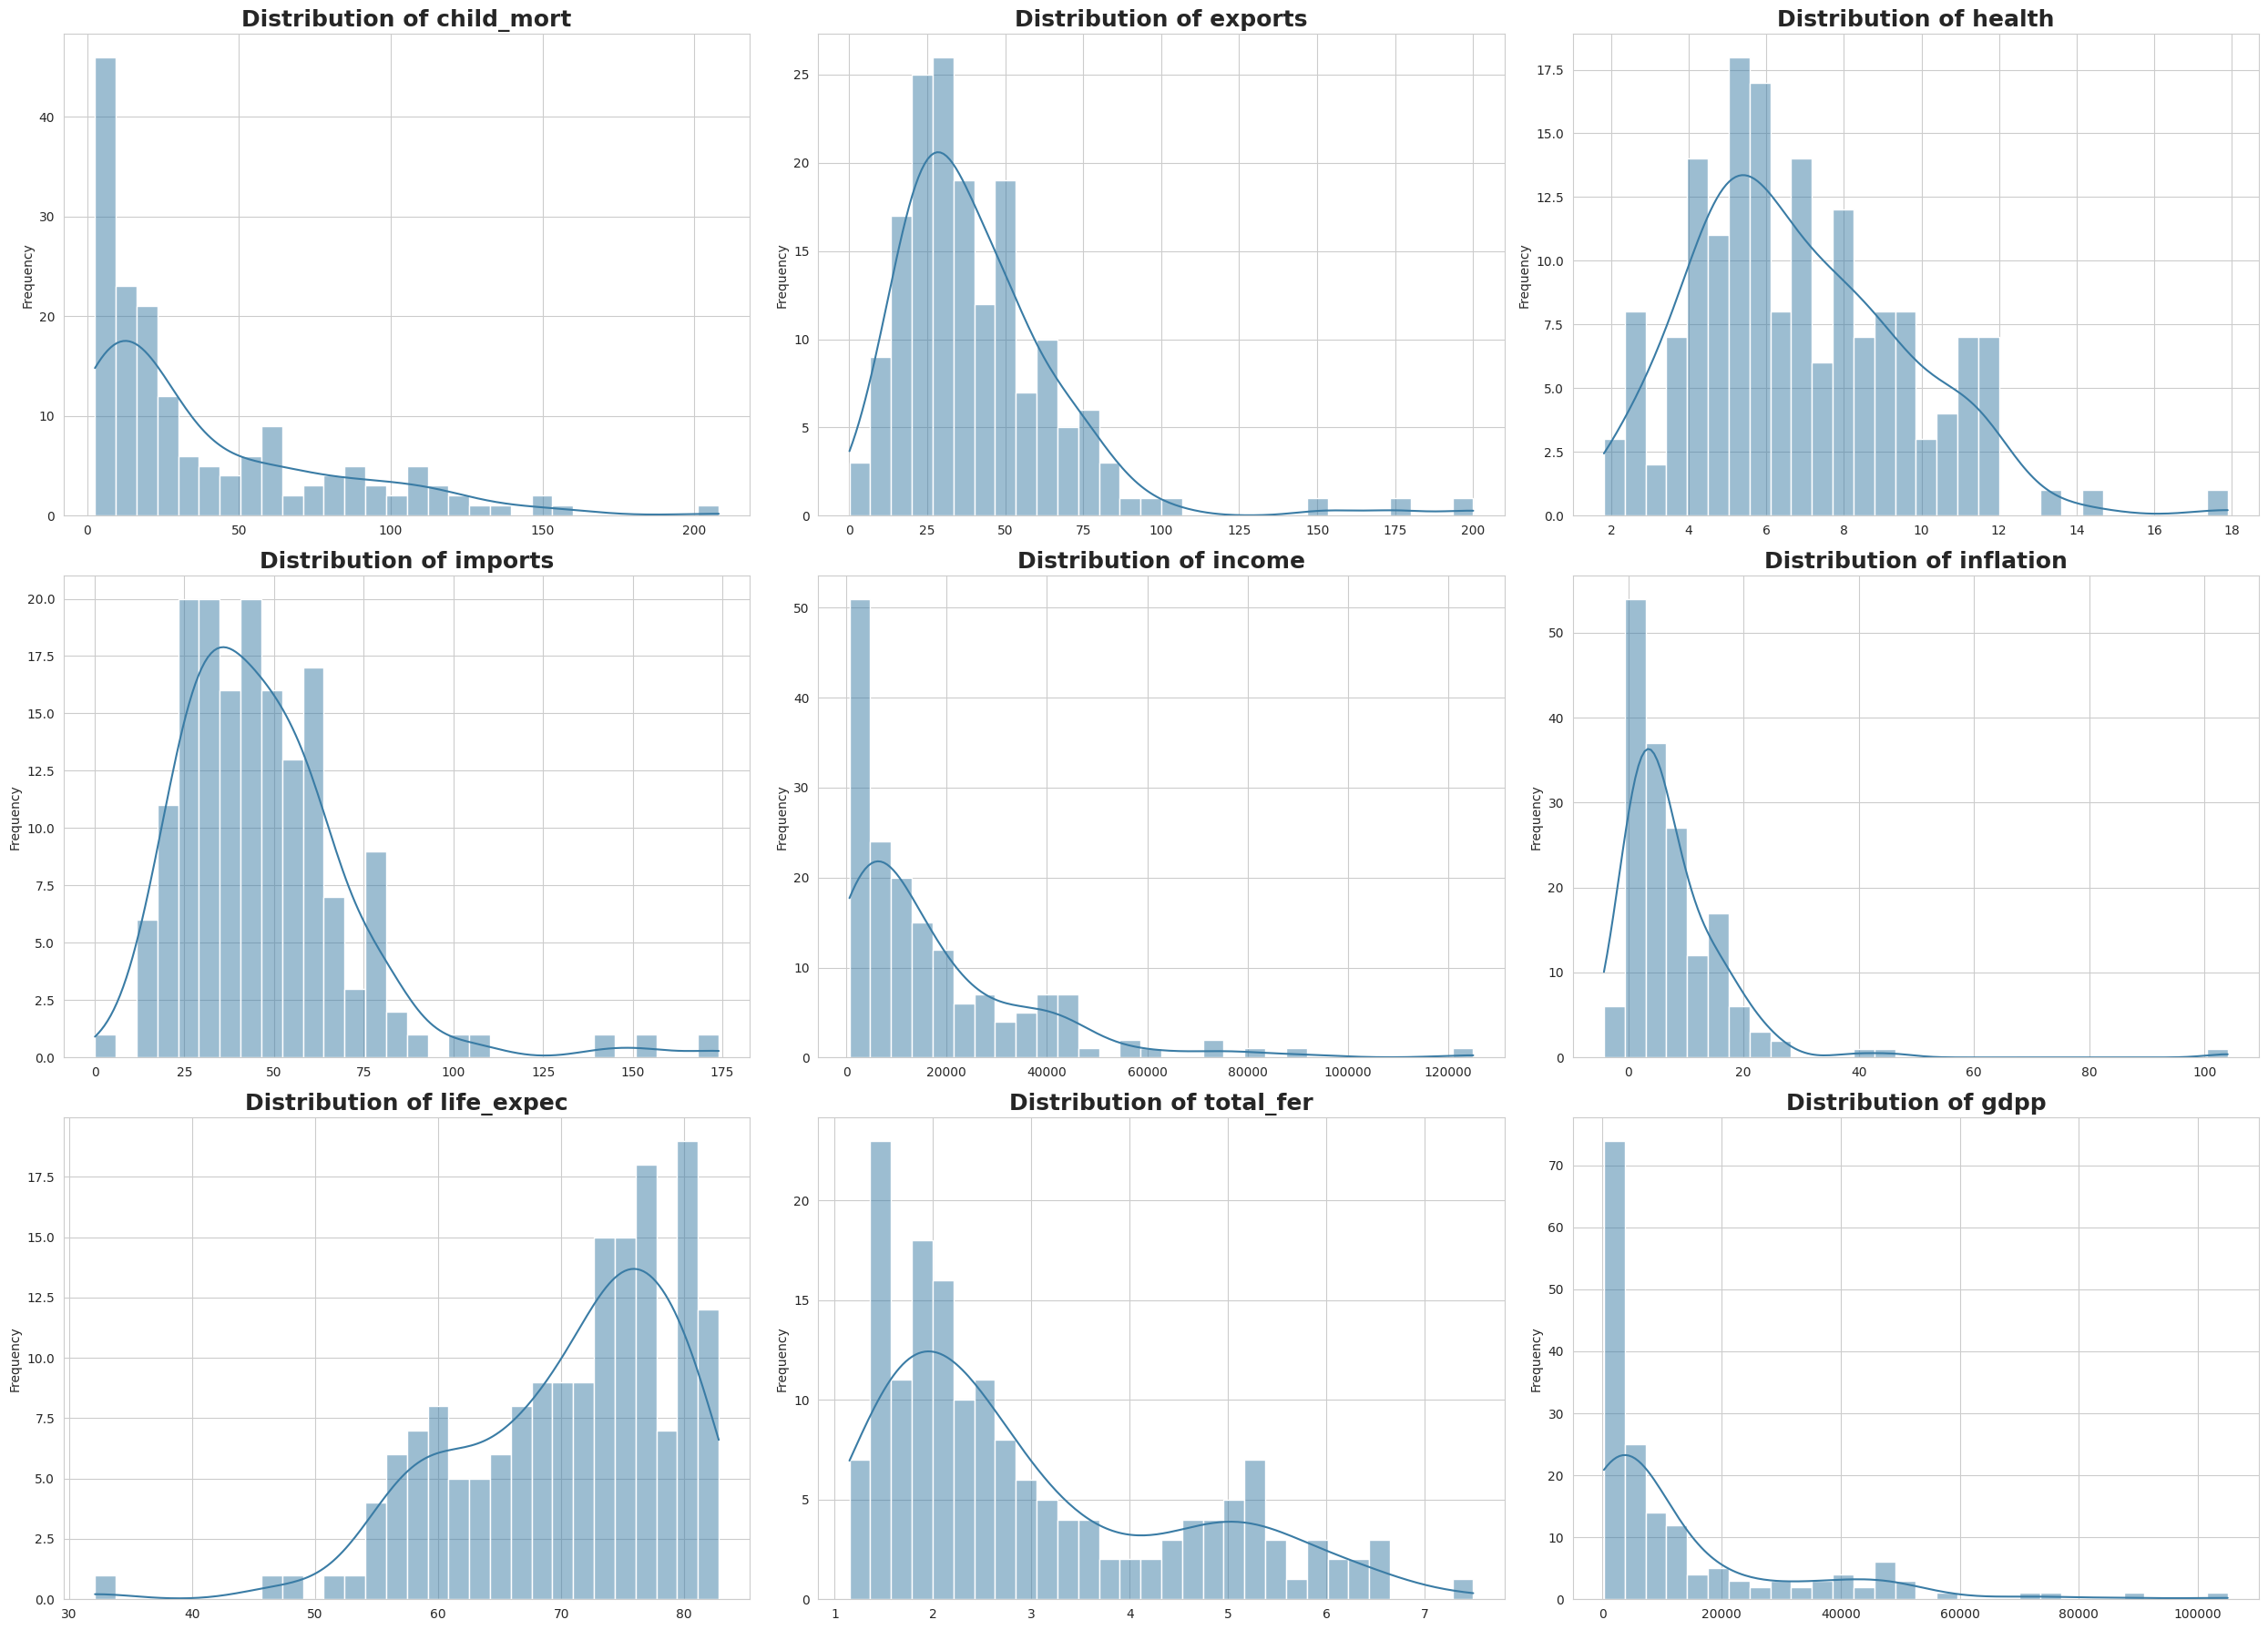

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

#Temporarily ignore warnings to keep visualization clean
import warnings
warnings.filterwarnings("ignore")

#List of numerical columns to visualize
df_columns = ['child_mort', 'exports', 'health', 'imports', 'income',
              'inflation', 'life_expec', 'total_fer', 'gdpp']

#Set overall figure size
fig = plt.figure(figsize = (25, 18))

#Apply general visualization style
sns.set_style("whitegrid")

#Loop through each variable to plot its distribution
for i, col in enumerate(df_columns):
    ax = fig.add_subplot(3, 3, i + 1)
    
    #Histogram with KDE curve (to show distribution shape)
    sns.histplot(data = df, x = col, kde = True, color = '#3a7ca5', ax = ax, bins = 30)
    
    #Add title and adjust formatting
    ax.set_title(f'Distribution of {col}', fontsize=18, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Frequency')
    ax.grid(True)

#Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Why check for outliers?
Outliers can disproportionately influence distance-based models like K-Means or Hierarchical Clustering. Identifying them visually helps us decide whether to cap, transform, or standardize those values later, ensuring that clusters are not driven by extreme cases.


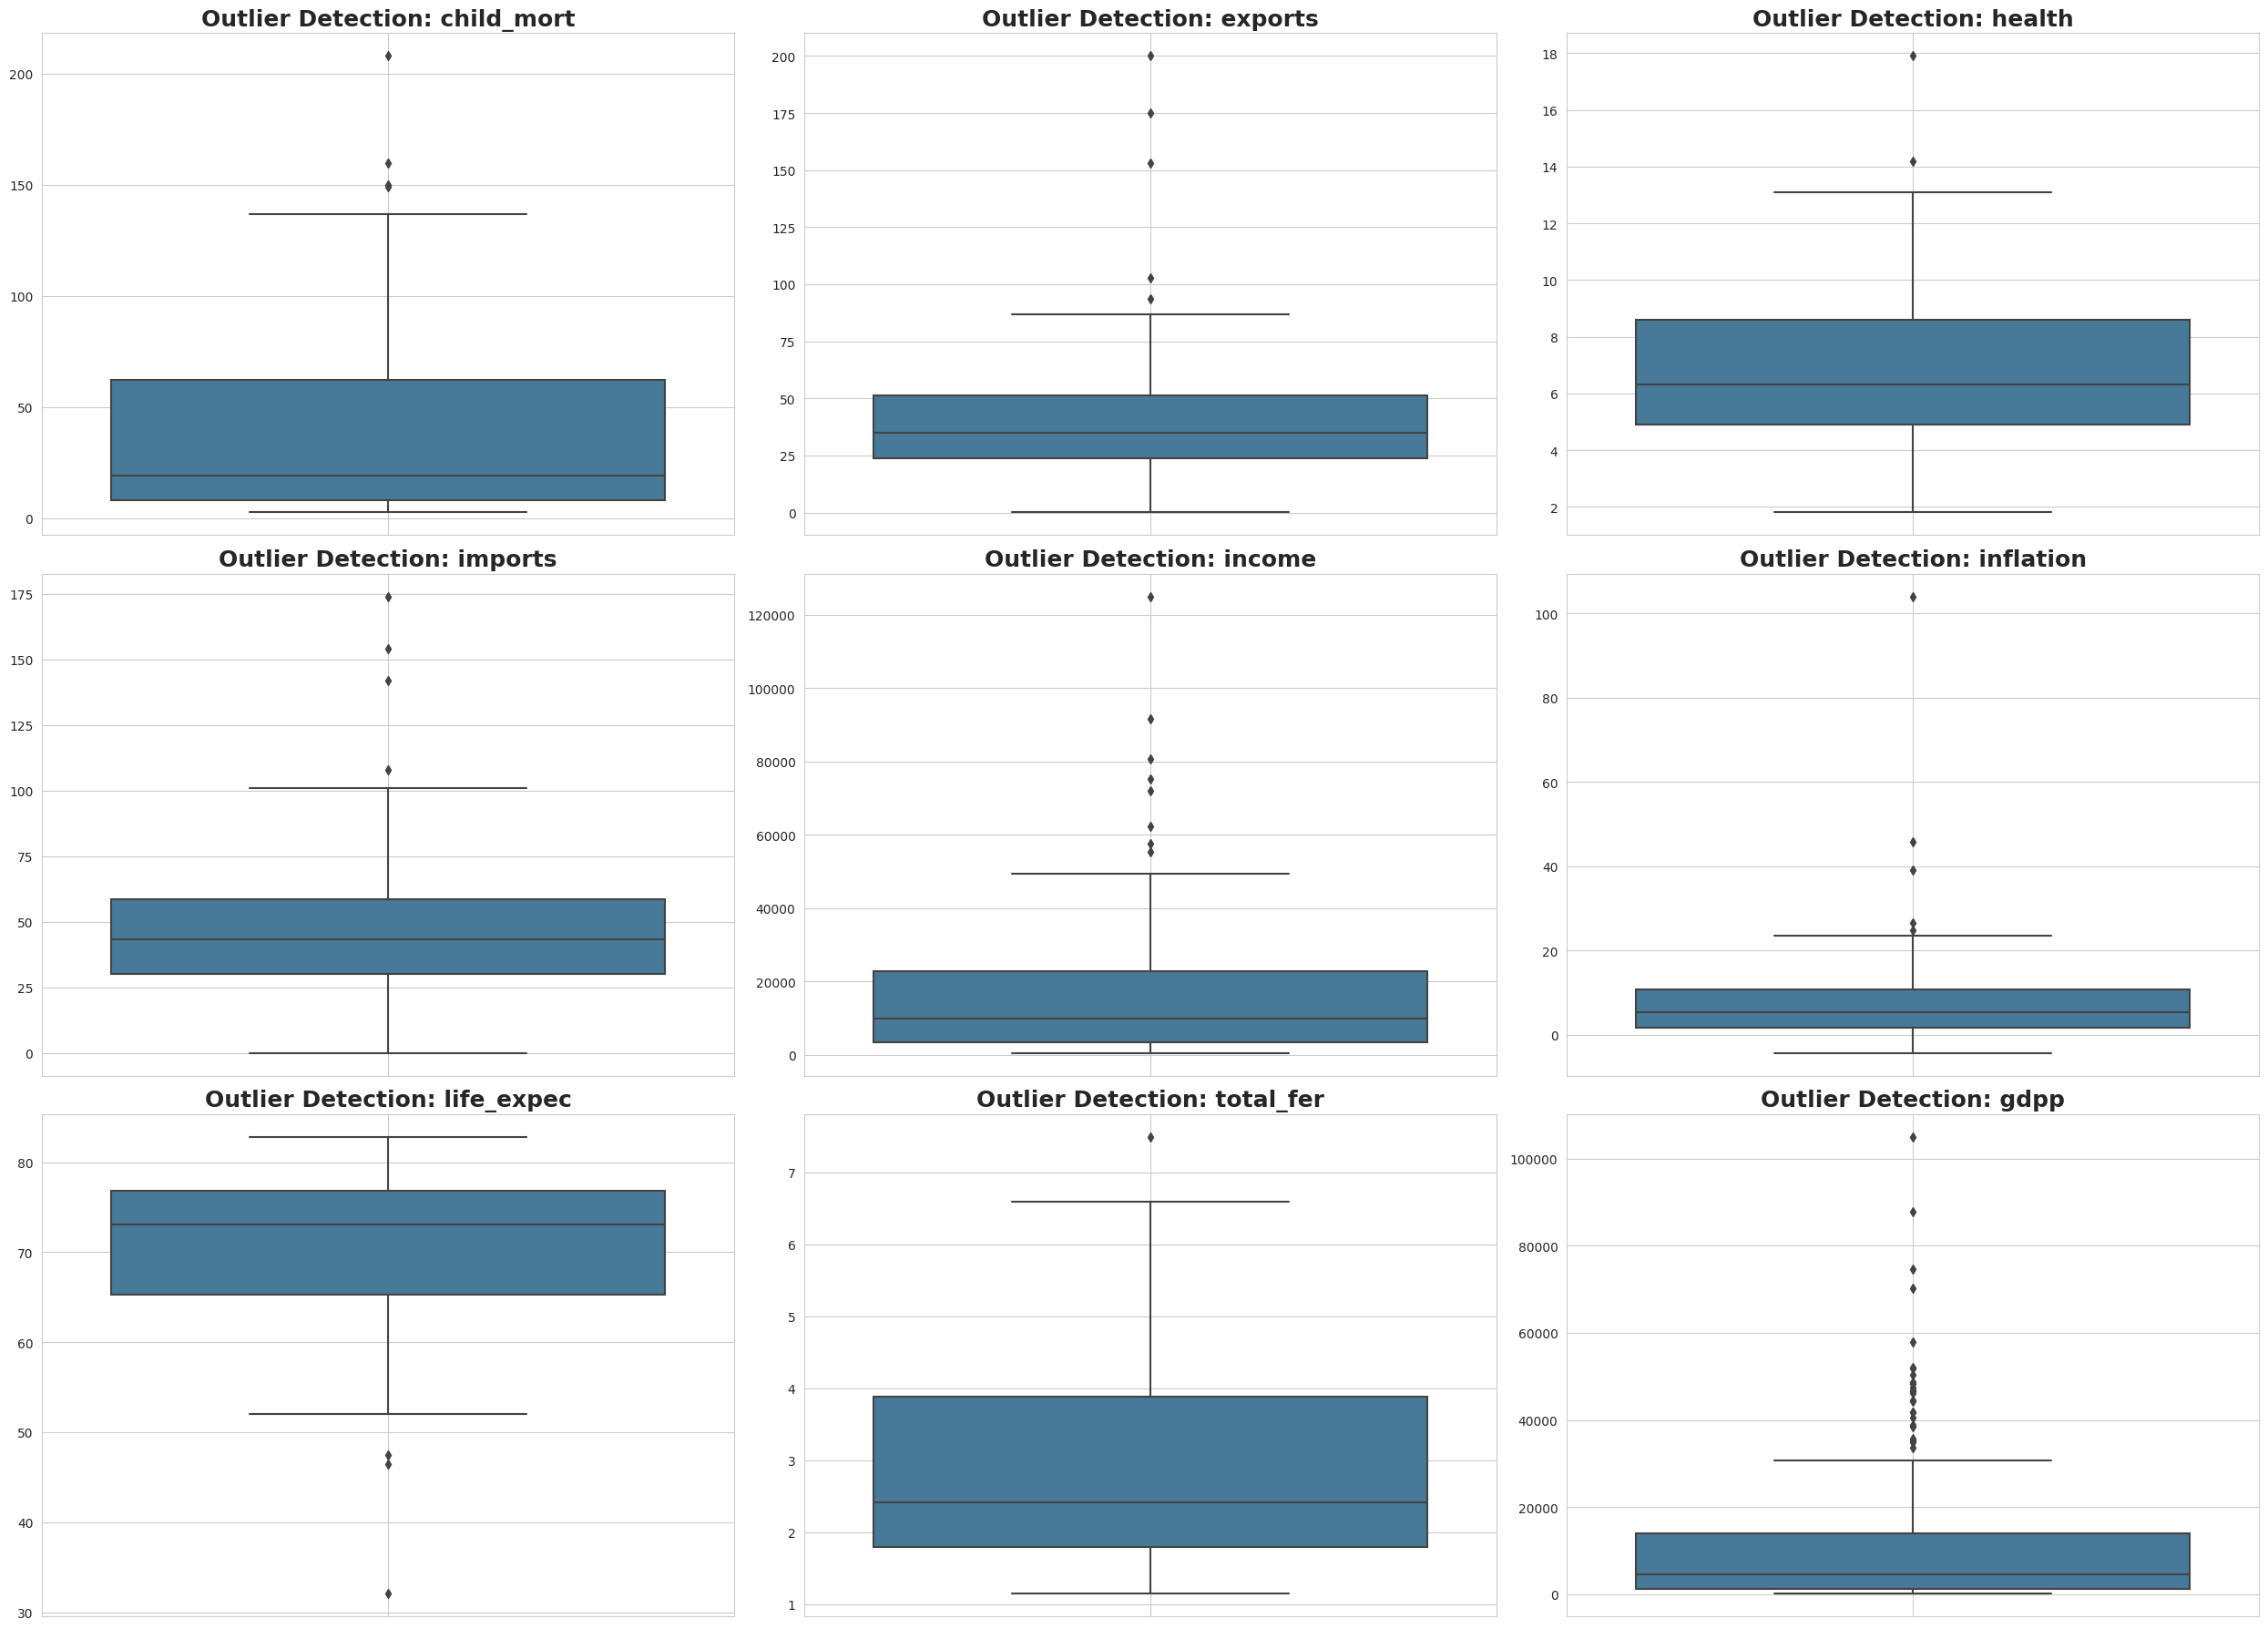

In [15]:
# Set overall figure size
fig = plt.figure(figsize = (25, 18))

#Apply general visualization style
sns.set_style("whitegrid")

#Loop through each variable to plot its boxplot
for i, col in enumerate(df_columns):
    ax = fig.add_subplot(3, 3, i + 1)
    
    #Boxplot to visualize outliers
    sns.boxplot(data = df, y = col, color = '#3a7ca5', ax = ax)
    
    #Add title and formatting
    ax.set_title(f'Outlier Detection: {col}', fontsize=18, fontweight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.grid(True)

#Adjust spacing between subplots
plt.tight_layout()
plt.show()

### Why analyze correlations?
Highly correlated variables carry overlapping information that can distort distance calculations and bias clustering results. This analysis guides potential feature reduction or transformation steps (for example, applying PCA to capture variance while avoiding redundancy).


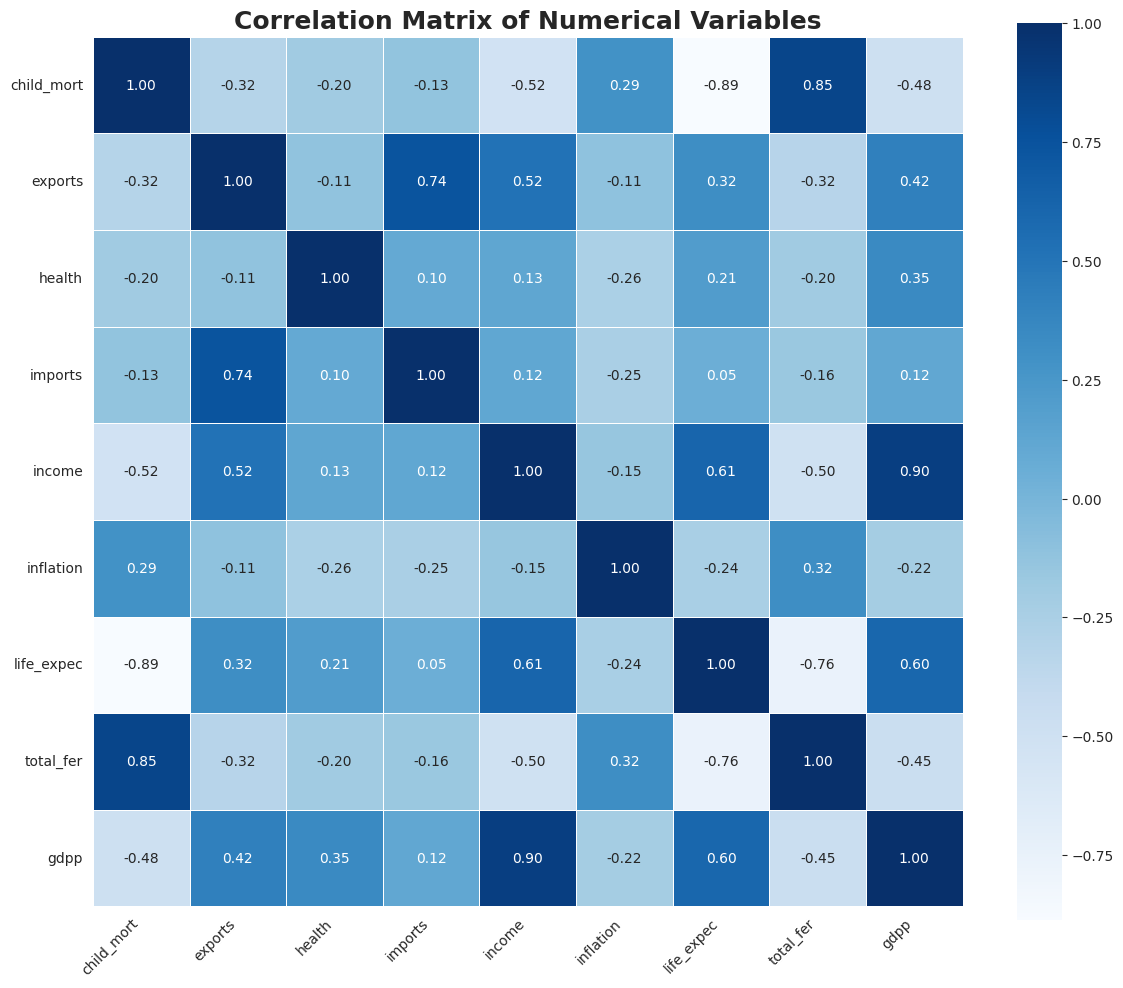

In [16]:
#Compute correlation matrix for numerical variables
corr = df.corr(numeric_only = True)

#Set up the figure
plt.figure(figsize = (12, 10))
sns.set_style("whitegrid")

#Draw the heatmap
sns.heatmap(corr, annot = True, fmt = ".2f", cmap = "Blues", linewidths = 0.5, square = True)

#Add title and formatting
plt.title("Correlation Matrix of Numerical Variables", fontsize = 18, fontweight = "bold")
plt.xticks(rotation = 45, ha = 'right')
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

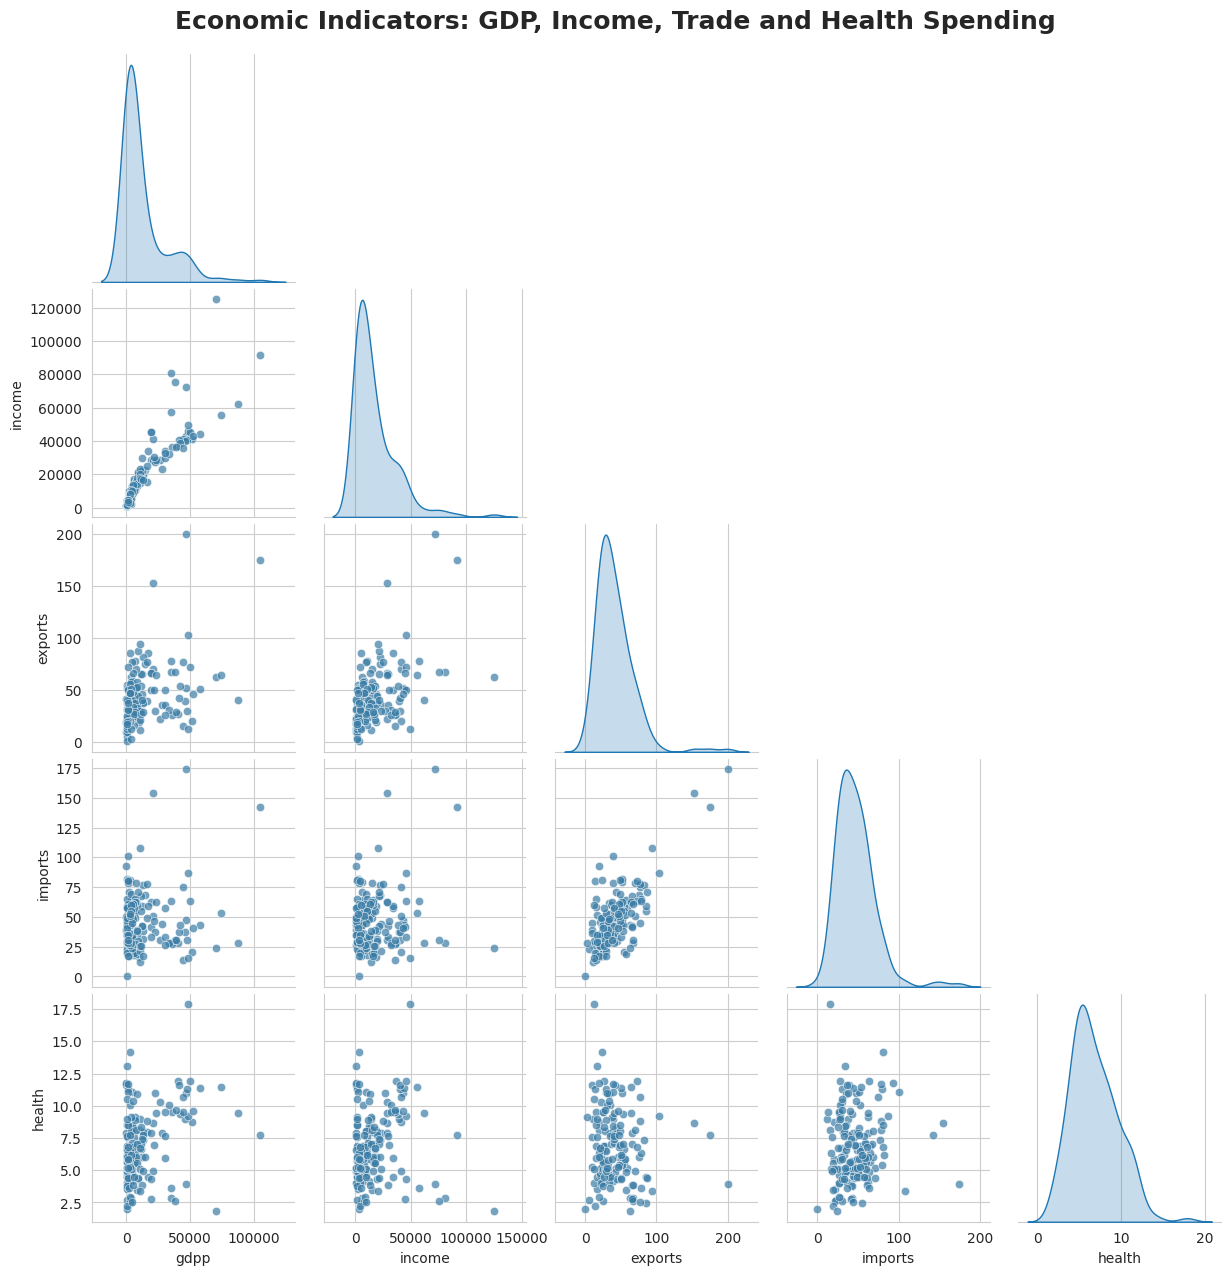

In [17]:
#Visualize the relationships between key economic indicators to understand 
#how national wealth (GDP per capita, income) interacts with trade activity (exports, imports) 
#and spending priorities. 

#Note: The 'health' variable is included here because it represents total health expenditure 
#as a percentage of GDP per capita, making it an economic indicator of how resources are 
#allocated, rather than a direct measure of public health outcomes.

#Create the pairplot for economic indicators
sns.pairplot(
    df[['gdpp', 'income', 'exports', 'imports', 'health']],
    diag_kind ='kde',        
    corner = True,           
    plot_kws = {'alpha':0.7, 'color':'#3a7ca5'}
)

#Add a global title
plt.suptitle('Economic Indicators: GDP, Income, Trade and Health Spending', 
             fontsize = 18, fontweight = 'bold', y = 1.02)
plt.show()

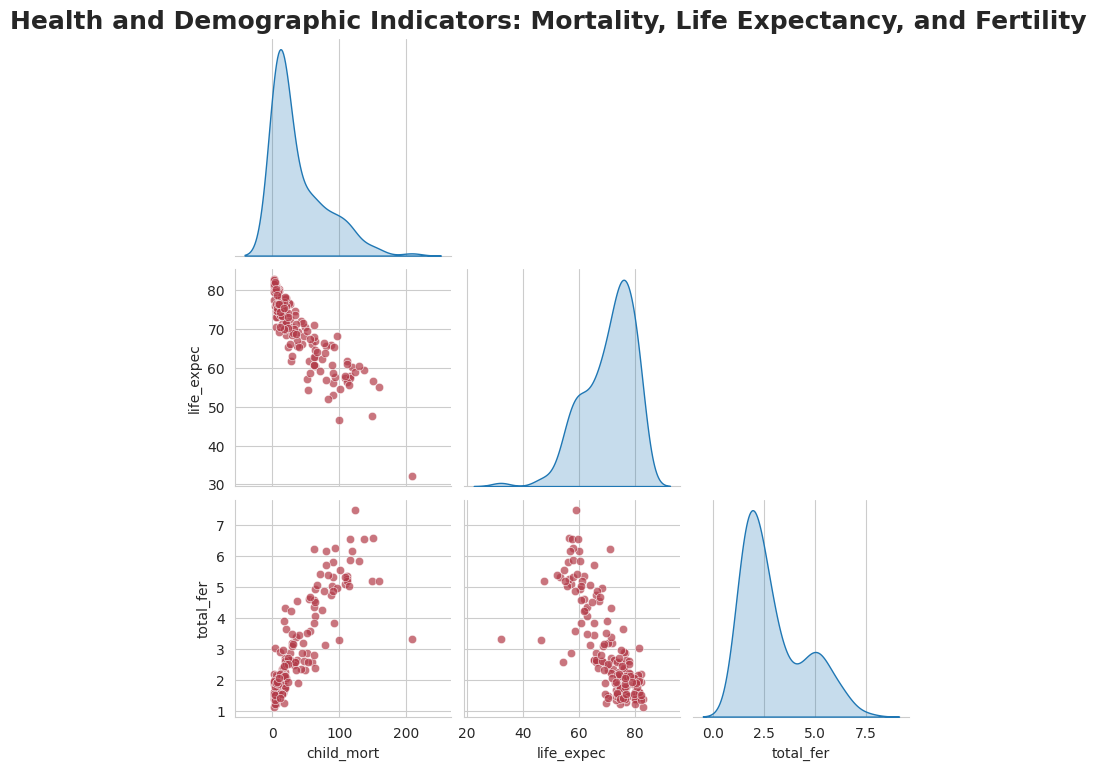

In [18]:
#Visualize the relationships between core health and demographic indicators 
#to understand how population well-being varies across countries. This plot helps 
#reveal key human development patterns.

#Create the pairplot for health and demographic indicators
sns.pairplot(
    df[['child_mort', 'life_expec', 'total_fer']],
    diag_kind = 'kde',        
    corner = True,            
    plot_kws = {'alpha':0.7, 'color':'#b23a48'} 
)

#Add a global title
plt.suptitle('Health and Demographic Indicators: Mortality, Life Expectancy, and Fertility',
             fontsize = 18, fontweight = 'bold', y = 1.02)
plt.show()

## 1.3-Preliminary Insights

The exploratory data analysis reveals clear disparities among the 167 countries across key socio-economic and health dimensions. Several important patterns emerge:

**Data Quality and Completeness**  
The dataset is clean (no missing or duplicated records) and contains only numerical variables besides country names. This ensures a straightforward transition to numerical modeling without extensive preprocessing.

**Distributional Patterns**  
Many variables, including `income`, `gdpp`, `exports`, and `imports`, show strong right-skewness and high kurtosis. This indicates the presence of a few very wealthy nations compared to the majority of developing countries. Variables like `child_mort` and `total_fer` show opposite skewness, reflecting health and fertility improvements concentrated among developed countries.  

Such skewness confirms that **log or scaling transformations** may be needed to stabilize variance before applying distance-based clustering algorithms.

**Outliers and Economic Extremes**  
Outliers are mainly found in economic indicators (`gdpp`, `income`, `inflation`), but they correspond to real-world differences. These values should not be removed outright, but rather normalized through scaling to ensure they don’t dominate clustering distances.

**Correlation Structure**  
Several strong correlations highlight interdependent development factors:
- `gdpp` and `income` are almost perfectly correlated (r ≈ 0.90), showing overlapping information about economic wealth.  
- `child_mort`, `life_expec`, and `total_fer` are highly correlated, forming a **health and demographic cluster**.  
- `exports` and `imports` also correlate strongly (r ≈ 0.74), capturing trade openness.  
These relationships suggest that **dimensionality reduction (PCA)** will likely help avoid redundancy and clarify the dominant patterns driving national development differences.

**Global Development Contrast**  
The distributions and maps consistently reveal a strong divide between high-income, low-mortality countries (mostly in Europe and North America) and developing nations (mainly in Africa and South Asia). This confirms that the dataset captures meaningful socioeconomic gradients suitable for unsupervised clustering.